In [5]:
# Import statements

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from skimage.feature import match_template

from pylab import rcParams

#ipython setting
%matplotlib notebook
rcParams['figure.figsize'] = (10, 6)

$\newcommand{\vecl}[1]{\begin{pmatrix}#1\end{pmatrix}}$ 
$\newcommand{\hvec}[1]{\widetilde{\boldsymbol{#1}}}$
$\newcommand{\nvec}[1]{\boldsymbol{#1}}$

## Header

--Text--

{'duration': 14.4,
 'ffmpeg_version': '2.8.11-0ubuntu0.16.04.1 built with gcc 5.4.0 (Ubuntu '
                   '5.4.0-6ubuntu1~16.04.4) 20160609',
 'fps': 29.97,
 'nframes': 432,
 'plugin': 'ffmpeg',
 'size': (640, 360),
 'source_size': (640, 360)}


<IPython.core.display.Javascript object>


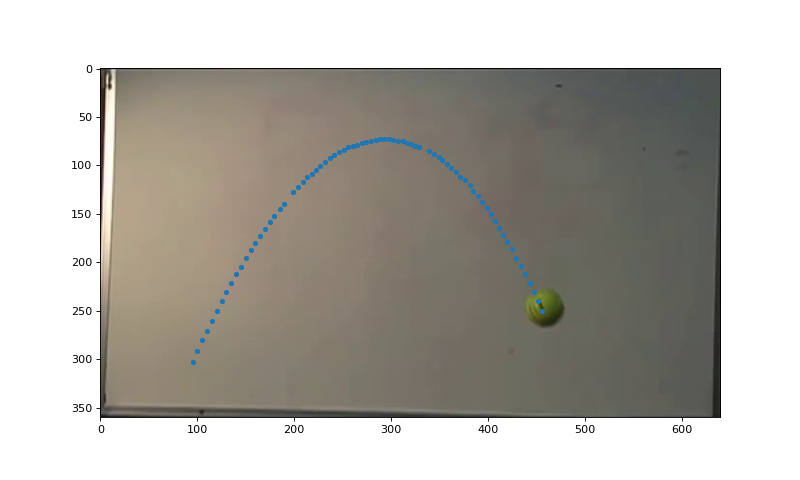

In [15]:
from os.path import isfile
import imageio
from pprint import pprint

videofile = 'ball2.mp4'
reader = imageio.get_reader(videofile)

pprint(reader.get_meta_data())
first_frame = reader.get_data(40)

fig, ax = plt.subplots()
template = first_frame[275:325, 70:125]
offset = [x / 2 for x in template.shape]
loc_x = []
loc_y = []

for i in range(40, 350):
    
    result = match_template(reader.get_data(i), template)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[1], ij[0]
    loc_x.append(x + offset[0])
    loc_y.append(y + offset[1])

ax.scatter(loc_x, loc_y, s=10)
ax.imshow(reader.get_data(350))
ax.axis("off")
plt.show()
    
# fig_anim, ax_anim = plt.subplots()
# img = plt.imshow(first_frame)
# scat = plt.scatter(100, 300)
    
def animate(i):
    
    this_frame = reader.get_data(i + 40)
    img.set_data(this_frame)
    result = match_template(this_frame, template)
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[1], ij[0]
    scat.set_offsets((x + offset[0], y + offset[1]))
    return img, scat

#ani = animation.FuncAnimation(fig_anim, animate, reader.get_length() - 50, interval=25)

#ani.save("trackBall3.mp4", writer="ffmpeg")
#plt.show()

[[-0.24104042 -0.23235057 -0.22481072 ...,  0.13229132  0.12066311
   0.10665406]
 [-0.22278449 -0.2138135  -0.20873484 ...,  0.14320002  0.12685545
   0.11039361]
 [-0.20515241 -0.19868669 -0.1927059  ...,  0.15875688  0.13987528
   0.11784875]
 ..., 
 [ 0.12420442  0.13355185  0.14105359 ...,  0.35121012  0.37697762
   0.4000532 ]
 [ 0.11772947  0.12724739  0.14093168 ...,  0.31126606  0.33616632
   0.36004376]
 [ 0.10770593  0.11267474  0.1273389  ...,  0.27736691  0.30088991
   0.32454458]]


<IPython.core.display.Javascript object>


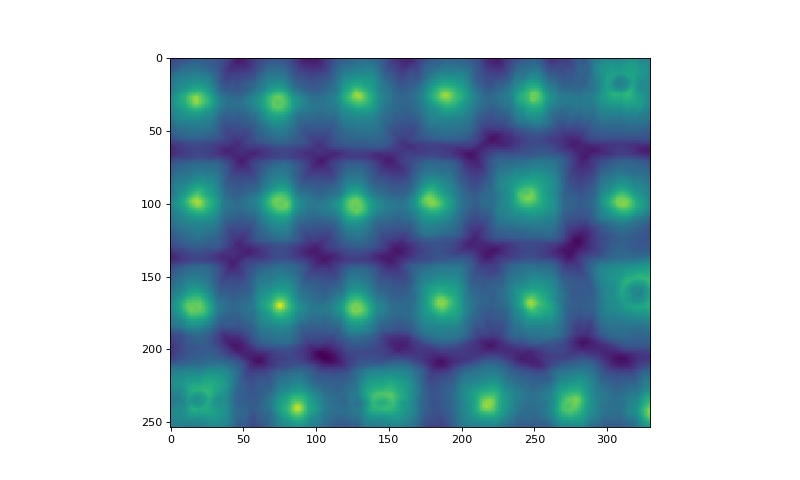

<IPython.core.display.Javascript object>


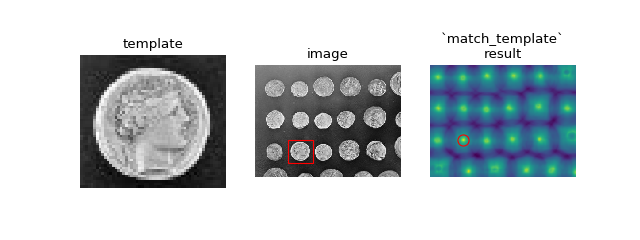

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data



image = data.coins()
coin = image[170:220, 75:130]

result = match_template(image, coin)
print(result)
plt.imshow(result)
plt.show()
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box-forced')

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

#plt.show()